In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (자신의 CSV 파일 경로로 변경)
file_path = file_path = "C:/Users/water/OneDrive/바탕 화면/iris-classification/titanic.csv"
# 데이터 불러오기
df = pd.read_csv(file_path)
# 데이터 확인
print("데이터 미리보기:")
print(df.head()) #df.head()괄호 안에 숫자만큼 행 출력

데이터 미리보기:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [3]:
#결측치 측정기기
missing_values = df.isnull().sum()
print("각각 결측치 개수:")
print(missing_values)
print("총 결측치 개수:", df.isnull().sum().sum())

각각 결측치 개수:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
총 결측치 개수: 866


In [5]:
# Age, Cabin, Embarked 열에 결측치가 있는 행 삭제
df.dropna(subset=['Age', 'Cabin', 'Embarked'], inplace=True)
print("결측치 개수 확인:")
print(df.isnull().sum()) 

결측치 개수 확인:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [17]:
#Age의 평균값 계산
mean_age = df['Age'].mean() #.mean()함수는 평균을 구함, 결측치는 자동으로 제외

#결측치를 평균값으로 채우기
df['Age'] = df['Age'].fillna(mean_age) #.fillna(mean_age)는 Age 열에서 NaN 값을 mean_age(평균값)으로 대체하는 함수

#결측치가 잘 채워졌는지 확인
print("Age 결측치 개수:", df['Age'].isnull().sum())

Age 결측치 개수: 0


레이블 값 종류: [1 0]

레이블 개수:
 Survived
1    123
0     60
Name: count, dtype: int64


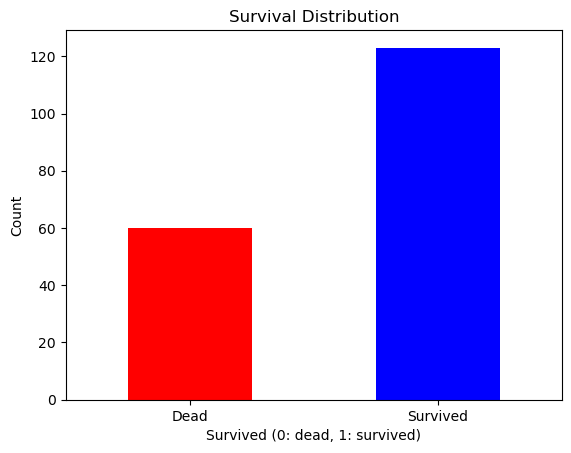

In [19]:
#레이블 값 종류 확인
print("레이블 값 종류:", df['Survived'].unique())  # .unique()함수는 Survived 열에 존재하는 고유한 값(레이블)을 리스트 형태로 반환

#각 레이블 개수 확인 (클래스 분포)
print("\n레이블 개수:\n", df['Survived'].value_counts()) # value_counts()는 Survived 열에서 각 값이 몇 번 등장하는지를 계산하여 반환

#시각화 (막대그래프)
import matplotlib.pyplot as plt
df['Survived'].value_counts().sort_index().plot(kind='bar', color=['red', 'blue'])#sort_index를 사용해 오름차순으로 바꾸어줌
plt.xlabel('Survived (0: dead, 1: survived)')
plt.ylabel('Count')
plt.title('Survival Distribution')
plt.xticks([0, 1], ['Dead', 'Survived'], rotation=0)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
# 불필요한 행 삭제
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked']) #inplace=True를 사용해야 df자체가 변경됨

# 삭제된 데이터프레임 확인
print("삭제 후 남은 컬럼 목록:", df.columns)

# 변환 전 - 'Sex' 컬럼의 값 개수 확인
print("변환 전 'Sex' 값 개수:\n", df['Sex'].value_counts())

# Label Encoding 적용
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

# 변환 후 - 숫자로 변환된 'Sex' 컬럼 값 개수 확인
print("\n변환 후 'Sex' 값 개수:\n", df['Sex'].value_counts())


삭제 후 남은 컬럼 목록: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
변환 전 'Sex' 값 개수:
 Sex
male      95
female    88
Name: count, dtype: int64

변환 후 'Sex' 값 개수:
 Sex
1    95
0    88
Name: count, dtype: int64


 모델별 정확도 비교:
Random Forest: 0.7027
Decision Tree: 0.8108
Logistic Regression: 0.7297
K-Nearest Neighbors: 0.6757
Support Vector Machine: 0.7838


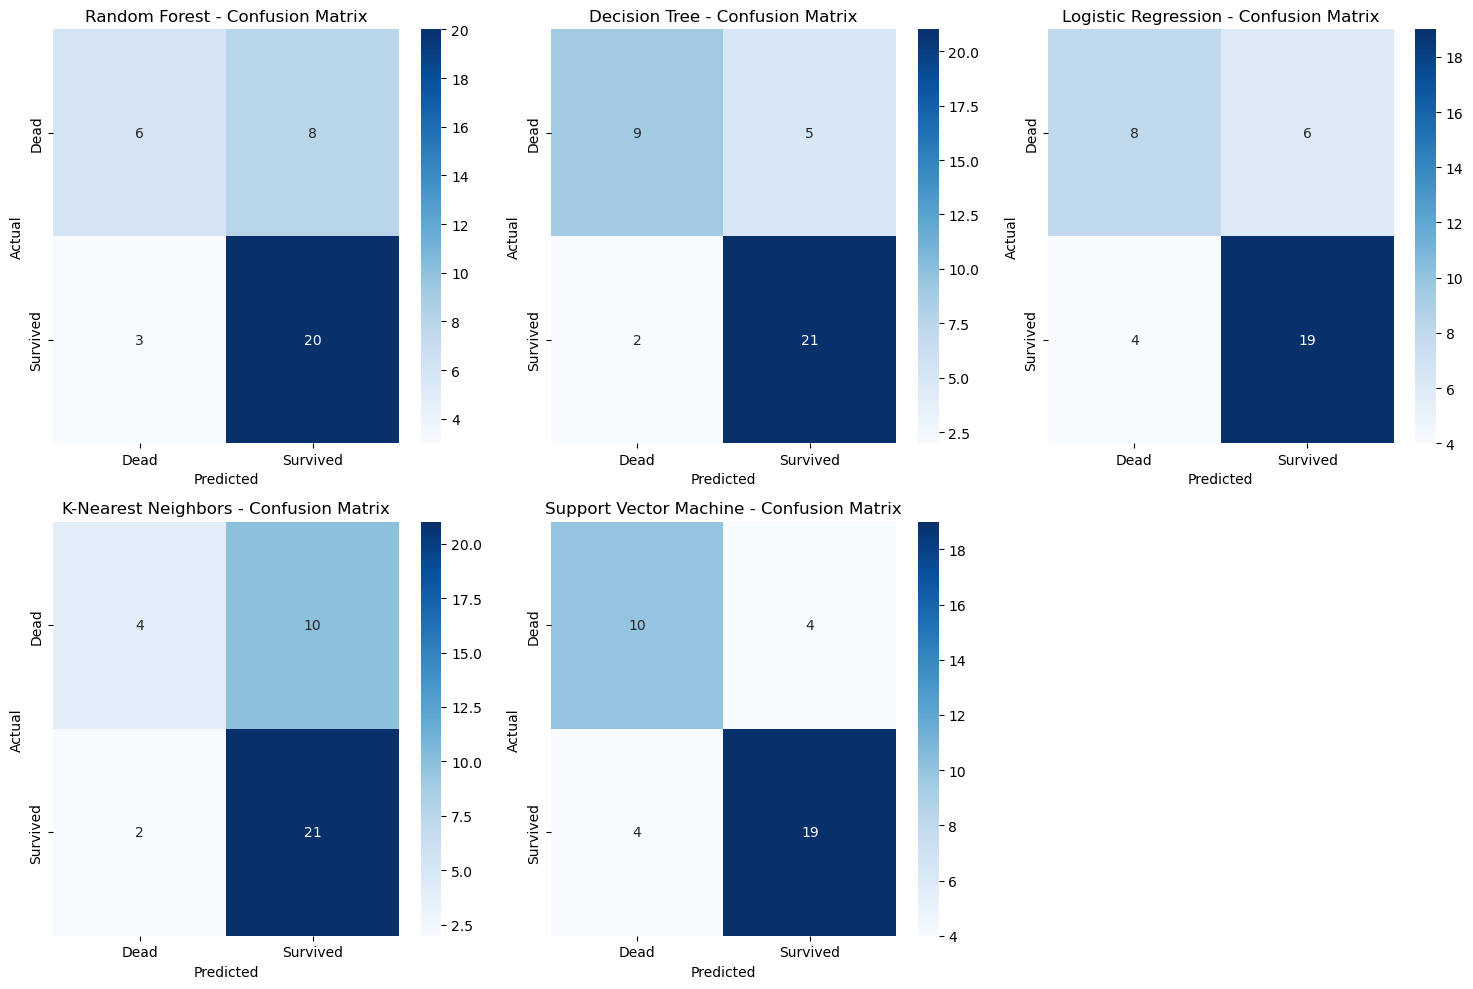

In [21]:

# 데이터 준비
# 'Survived'가 타겟 변수, 나머지는 입력 변수
X = df.drop(columns=['Survived'])
y = df['Survived'] # 모델이 예측해야 하는 값

# 훈련 데이터와 테스트 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5가지 분류 모델 정의
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), # 100개 결정트리
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200), # 최대 200번 반복
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5), #이웃 5개의 데이터를 참조
    "Support Vector Machine": SVC(kernel='linear')
}

# 모델 학습 및 평가
results = {}
conf_matrices = {}

for name, model in models.items():
    # 모델 학습 시작
    model.fit(X_train, y_train)
    
    # 예측 수행 시작
    y_pred = model.predict(X_test)
    
    # 정확도 저장
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # 혼동 행렬 저장
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# 정확도 출력
print(" 모델별 정확도 비교:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}") #문자열 포맷팅을 이용해 정확도 소수점 4자리지지

# 혼동 행렬 시각화
plt.figure(figsize=(15, 10))
for i, (name, cm) in enumerate(conf_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dead', 'Survived'], yticklabels=['Dead', 'Survived'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")

plt.tight_layout()
plt.show()
